_ATU Donegal - MSc in Data Science: Machine Learning_
**<h1>Lab 6: Dimensionality Reduction</h1>**

PCA is a dimensionality reduction technique. It allows us to distill multi-dimensional data down to fewer dimensions, selecting new dimensions that preserve as much variance as possible in the data. We've seen how to implement PCA from scratch, so let's use this to learn how a model is written in Scikit-Learn.

There are four methods we need to implement for a functional PCA class:
1. The `__init__()` method which initialises any input values
2. The `.fit()` method should standardise the input matrix; calculate the covariance matrix and determine eigenvalues and eigenvectors; sort the eigenvectors and eigenvalues in order of decreasing eigenvalue; transform the input matrix into the reduced subspace; and calculate the explained variance per component
3. The `.transform()` method which uses the principal components calculated to compute the reduced representation of the input matrix
4. The `fit_transform()` method which firsts fits by calling the `.fit()` method and then transforms by calling the `.transform()` method.

Once we've done this we have a class which is compatible with Scikit-Learn and can be used in pipelines, just like the `PCA` class in from the `sklearn.decomposition` module.

In [ ]:
import numpy as np

class PCA():
  def __init__(self, n_components=2):
    self.n_components = n_components

  def fit(self, X):
    pass

  def transform(self, X):
    pass

  def fit_transform(self, X):
    pass


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
model = PCA(0.9)
X = iris.data
X_reduced = model.fit_transform(X)

In [ ]:
# model.fit(X)
# model.pcs
# model.explained_variance

## The Iris Dataset

The Iris dataset that comes with Scikit-learn is a standard dataset for developing intuition about PCA. It's a relatively small collection of data that has four dimensions for three different kinds of Iris flowers: the length and width of both the petals and sepals of many individual flowers from each species. Let's load it up and have a look:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

num_samples, num_features = iris.data.shape
print(num_samples)
print(num_features)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


So, this tells us our data set has 150 samples (individual flowers) in it. It has 4 dimensions - called features here, and three distinct Iris species that each flower is classified into.

While we can visualize 2 or even 3 dimensions of data pretty easily, visualizing 4D data isn't something our brains can do. So let's distill this down to 2 dimensions, and see how well it works:

In [ ]:
X = iris.data
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
# print(X_pca)

What we have done is distill our 4D data set down to 2D, by projecting it down to two orthogonal 4D vectors that make up the basis of our new 2D projection. We can see what those 4D vectors are, although it's not something you can really wrap your head around:

In [ ]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Let's see how much information we've managed to preserve:

In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


We see that although we have thrown away two of our four dimensions, PCA has chosen the remaining two dimensions well enough that we've captured 92% of the variance in our data in a single dimension alone! The second dimension just gives us an additional 5%; altogether we've only really lost about 2% of the variance in our data by projecting it down to two dimensions.

As promised, now that we have a 2D representation of our data, we can plot it:

In [ ]:
# print(X_pca)

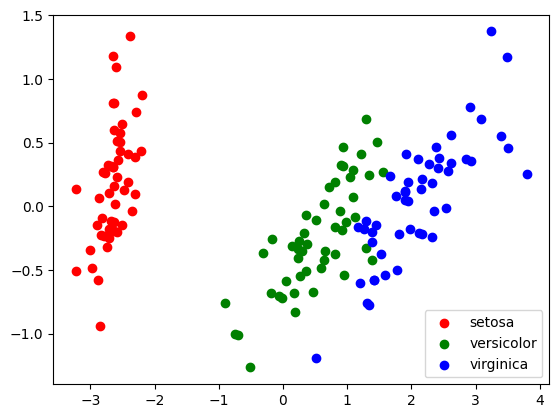

In [ ]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()


You can see the three different types of Iris are still clustered pretty well. If you think about it, this probably works well because the overall size of an individual flower likely makes both the petal and sepal sizes increase by a similar amount. Although the actual numbers on this graph have no intuitive meaning, what we're likely seeing is a nondimensional measure of the ratio of width to height for petals and sepals - and PCA distilled our data down to that on its own.

### Exercise
1. Our results suggest we could actually distill this data down to a single dimension and still preserve most of its variance. Try it! Do a PCA down to one component, and see how it turns out.

In [ ]:
X = iris.data
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

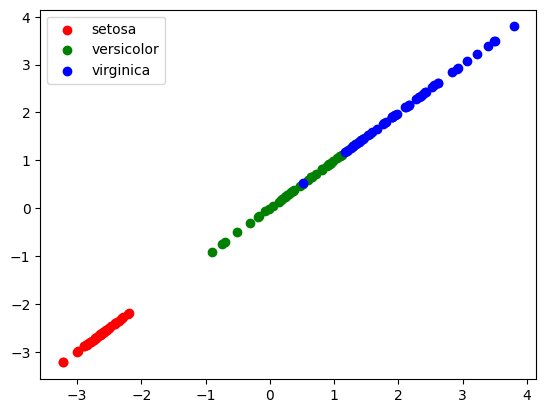

In [ ]:
%matplotlib inline
# from pylab import *

# Requried to change  the index from 0 to 1
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 0],
        c=c, label=label)
pl.legend()
pl.show()


## PCA for Digits

The digits dataset is a set of 1797 $8\times 8$ labelled images of handwritten digits ($0$-$9$), so we have about 180 samples per class. It's useful for trying out many different machine learning algorithms, including PCA.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Since we have 8×8 pixel images, the dataset has 64 dimensions.
For some exploratory analysis, we can use PCA to project them to two dimensions:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

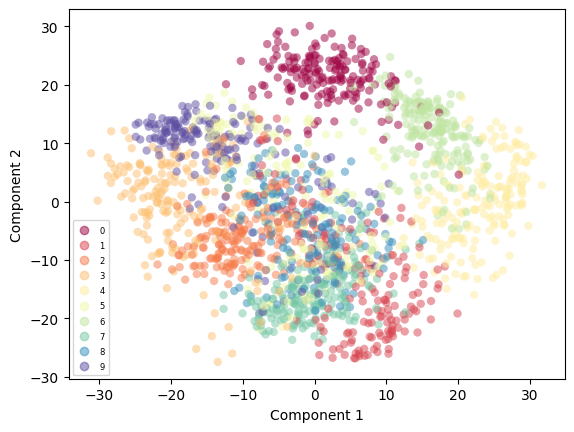

In [ ]:
import matplotlib.pyplot as plt
scatter = plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap='Spectral')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements(), prop={'size': 6})
plt.savefig(fname='digits_pca.png', dpi=200)

Remember, the full dataset is a 64-dimensional point cloud, which we can't possibly visualise. The points we've plotted here are the projection of each of the original data points along the directions with the *largest variance*.

This corresponds to the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions.

Also note that this is *unsupervised* -- we haven't used the labels for the PCA analysis, only in the visualisation step.

### Choosing the Number of Components

We used two components in our first run of PCA, but this is just for visualisation purposes. If we want use PCA in conjunction with some other algorithms, we'll need to estimate how many components are needed to describe the data usefully.

We do this by examining the cumulative *explained variance ratio* as a function of the number of components:

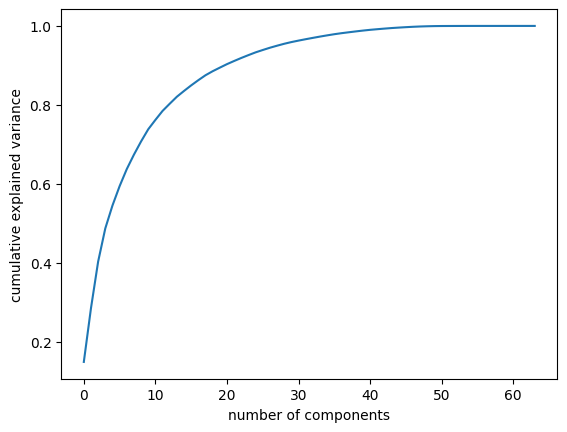

In [ ]:
import numpy as np
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This plot tells us how much of the total variance in the original 64 dimensions is contained within the first $n$ components found by PCA.

For example, we see that the first 10 components contain about $75\%$ of the variance, while we need around 50 components to approach $100\%$ of the variance. It should also be clear from this plot that our 2D projection loses a lot of information. We would need about 20 components to retain 90% of the variance.

### Exercise

2. We often choose the number of features to be retained based on a specified variance. Find the number of features required to retain $95\%$ and $99\%$ of the variance here.

In [ ]:
X = digits.data
pca = PCA()

# Fit and transform the data
X_dig_pca= pca.fit_transform(X)

# Calculate the cumulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required for 95% and 99% variance
num_components_95 = np.argmax(cumulative_var >= 0.95) + 1 # Plus 1 as the numbers starts from 0
num_components_99 = np.argmax(cumulative_var >= 0.99) + 1


print(f"No  of components {num_components_95} is required for 95% of variance")
print(f"No  of components {num_components_99} is required for 99% of variance")


No  of components 29 is required for 95% of variance
No  of components 41 is required for 99% of variance


## t-SNE
The code below creates a visualisation of the dataset by applying $t$-SNE.

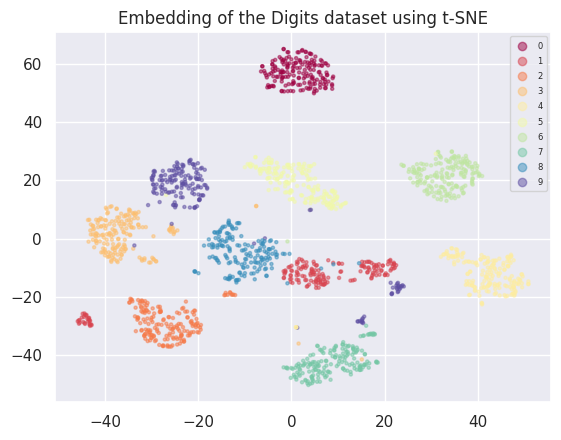

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.manifold import TSNE
tsne = TSNE()
X, y =load_digits(return_X_y=True)
X = tsne.fit_transform(X)
scatter = plt.scatter(X[:,0], X[:,1], s=5, c=digits.target, cmap='Spectral', alpha=0.5)
plt.legend(*scatter.legend_elements(), prop={'size': 6})
plt.title('Embedding of the Digits dataset using t-SNE', fontsize=12);
plt.savefig(fname="tsne_digits.png", dpi=300)


## UMAP
The code below creates a visualisation of the dataset by applying UMAP.

In [ ]:
%%capture
!pip install umap-learn
import umap

In [ ]:
transformer = umap.UMAP(n_neighbors=5) #random_state disables parallelism
# X, y = datasets.load_digits(return_X_y=True)
X, y = load_digits(return_X_y=True)

X = transformer.fit_transform(X)

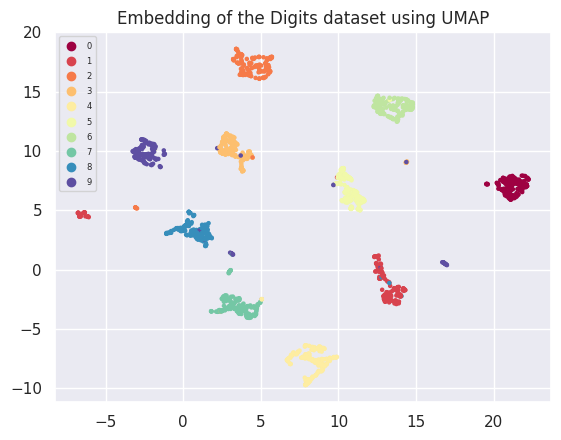

In [ ]:
scatter = plt.scatter(X[:,0], X[:,1], s=5, c=y, cmap='Spectral')
plt.legend(*scatter.legend_elements(), prop={'size': 6})
plt.title('Embedding of the Digits dataset using UMAP', fontsize=12);
plt.savefig(fname="digits_umap.png", dpi=300)
#plt.figure(figsize=(15,15))


## PCA with Other Algorithms

We've seen how the curse of dimensionality can affect the performance of other algorithms, when the dataset has a large number of features. PCA can be used as a data preprocessing step to address this problem. Let's try this out with a nearest neighbours model on the digits dataset. We could do this straight off without PCA, but it turns out we can dramatically reduce the number of dimensions and still achieve a very good accuracy with KNN.

This time, we'll load the dataset and split it into train and test sets, so we can use the test set to determine the accuracy of the KNN model after fitting it.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, stratify=y)



## Exercises*

3. Create a pipeline consisting of a standard scaler, a KNN model and then a PCA model -- we've seen how to do all of these now.
4. Use `fit_transform` to project the digits data into your chosen number of dimensions and fit the KNN model to it.
5. Calculate the accuracy of the KNN model on the test set (`X_test` and `y_test` which we created above) and obtain the classification report and normalised confusion matrix. Remember we can only use the `pca.transform()` method on `X_test` to project it into the same space as the training data! `fit_transform()` is only used with training data.
6. Try out different values of $n$ for PCA with different values of $k$ for KNN.
7. Using the preprocessed PCA data, compare the performance on the digits dataset of each of the following supervised learning models we've seen: logistic regression, weighted nearest neighbour, support vector machines, random forests, and gradient boosted trees.
8. For each of these models, create a plot illustrating the decision boundaries and model performance on the test set.

#3 Create a pipeline consisting of a standard scaler, a KNN model and then a PCA model -- we've seen how to do all of these now.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                            ('scaler', StandardScaler()),
                             ('pca', PCA(n_components=0.95)) ,
                     ('knn', knn(n_neighbors=5))
                    ])


#4 Use fit_transform to project the digits data into your chosen number of dimensions and fit the KNN model to it.

In [ ]:
# Fit the pipeline on the training dataaccuracy_score
from sklearn.metrics import accuracy_score
pipeline.fit(X_train, y_train)

len(pipeline["pca"].explained_variance_ratio_)
# Make predictions on the test set
y_pred = pipeline.predict(X_train)

# Evaluate the accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy Score for KNN Train Data = {accuracy}")

Accuracy Score for KNN Train Data = 0.9867780097425192


#5 Calculate the accuracy of the KNN model on the test set (X_test and y_test which we created above) and obtain the classification report and normalised confusion matrix. Remember we can only use the pca.transform() method on X_test to project it into the same space as the training data! fit_transform() is only used with training data.

In [ ]:
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for KNN Test Data= {accuracy}")

Accuracy Score for KNN Test Data= 0.9694444444444444


In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix

# n_components varinace = 0.97
# Neighbours = 3
# Accuracy Score for KNN Train Data = 0.9860821155184412
# Accuracy Score for KNN Test Data = 0.9833333333333333

pipeline = Pipeline([
                             ('pca', PCA(n_components=0.95)) ,
                            ('scaler', StandardScaler()),
                     ('knn', knn(n_neighbors=3))
                    ])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_train)

# Evaluate the accuracy
accuracy = accuracy_score(y_train, y_pred)

y_pred_test = pipeline.predict(X_test)

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)


print(f"Accuracy Score for KNN Train Data = {accuracy}")
print(f"Accuracy Score for KNN Test Data = {accuracy_test}")

class_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report)

Accuracy Score for KNN Train Data = 0.988169798190675
Accuracy Score for KNN Test Data = 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.90      1.00      0.95        36
           2       1.00      1.00      1.00        35
           3       0.92      0.97      0.95        37
           4       0.97      0.92      0.94        36
           5       1.00      0.95      0.97        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.86      0.92        35
           9       0.92      0.97      0.95        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



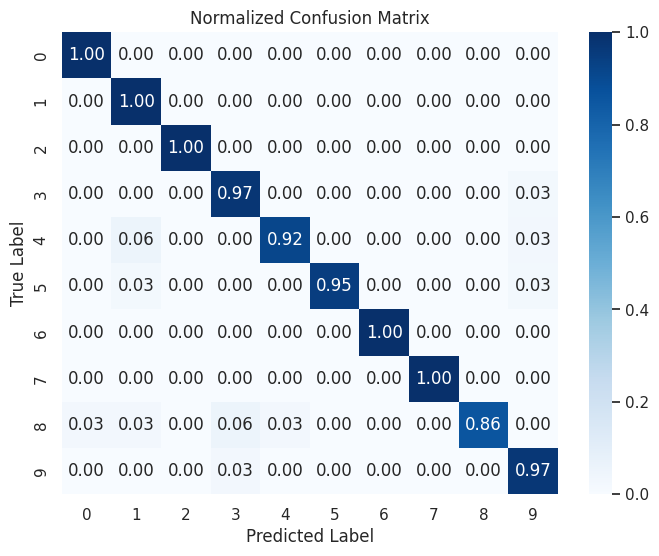

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#6 Try out different values of  n  for PCA with different values of  k  for KNN.

In [ ]:
var = [0.75,0.85,0.89,0.97]
for v in var:
  for n in range(1,25,2):
    pipeline = Pipeline([
                             ('pca', PCA(n_components=v)) ,
                            ('scaler', StandardScaler()),
                     ('knn', knn(n_neighbors=n))
                    ])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_train)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_train, y_pred)

    y_pred_test = pipeline.predict(X_test)

    # Evaluate the accuracy
    accuracy_test = accuracy_score(y_test, y_pred_test)



    print(f"n_components varinace = {v}\nNeighbours = {n}")
    print(f"Accuracy Score for KNN Train Data = {accuracy}")
    print(f"Accuracy Score for KNN Test Data = {accuracy_test}")
    print("________________________________________________")


n_components varinace = 0.75
Neighbours = 1
Accuracy Score for KNN Train Data = 1.0
Accuracy Score for KNN Test Data = 0.9638888888888889
________________________________________________
n_components varinace = 0.75
Neighbours = 3
Accuracy Score for KNN Train Data = 0.988169798190675
Accuracy Score for KNN Test Data = 0.9666666666666667
________________________________________________
n_components varinace = 0.75
Neighbours = 5
Accuracy Score for KNN Train Data = 0.9832985386221295
Accuracy Score for KNN Test Data = 0.9666666666666667
________________________________________________
n_components varinace = 0.75
Neighbours = 7
Accuracy Score for KNN Train Data = 0.9784272790535838
Accuracy Score for KNN Test Data = 0.9666666666666667
________________________________________________
n_components varinace = 0.75
Neighbours = 9
Accuracy Score for KNN Train Data = 0.97633959638135
Accuracy Score for KNN Test Data = 0.9666666666666667
________________________________________________
n_compon

#7 Using the preprocessed PCA data, compare the performance on the digits dataset of each of the following supervised learning models we've seen: logistic regression, weighted nearest neighbour, support vector machines, random forests, and gradient boosted trees

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, stratify=y)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
])

# Fit and transform the training data using PCA
X_train_transformed = pipeline.fit_transform(X_train)

# Transform the test set using the same PCA transformation
X_test_transformed = pipeline.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Weighted KNN': knn(n_neighbors=3, weights='distance'),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
for model_name, model in models.items():
    # Fit the model on the transformed training data
    model.fit(X_train_transformed, y_train)

    # Make predictions on the transformed test set
    y_pred_test = model.predict(X_test_transformed)

    # Calculate and print accuracy
    accuracy_test = accuracy_score(y_test, y_pred_test)


    # Train Accuracy
    y_pred_train = model.predict(X_train_transformed)

    # Calculate and print accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"{model_name} \n Test Accuracy: {accuracy_test} \n Train Accuracy: {accuracy_train}")
    print("\n\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 
 Test Accuracy: 0.9444444444444444 
 Train Accuracy: 0.9958246346555324



Weighted KNN 
 Test Accuracy: 0.9666666666666667 
 Train Accuracy: 1.0



SVM 
 Test Accuracy: 0.975 
 Train Accuracy: 0.9979123173277662



Random Forest 
 Test Accuracy: 0.9583333333333334 
 Train Accuracy: 1.0



Gradient Boosting 
 Test Accuracy: 0.9222222222222223 
 Train Accuracy: 1.0





#8 For each of these models, create a plot illustrating the decision boundaries and model performance on the test set.

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


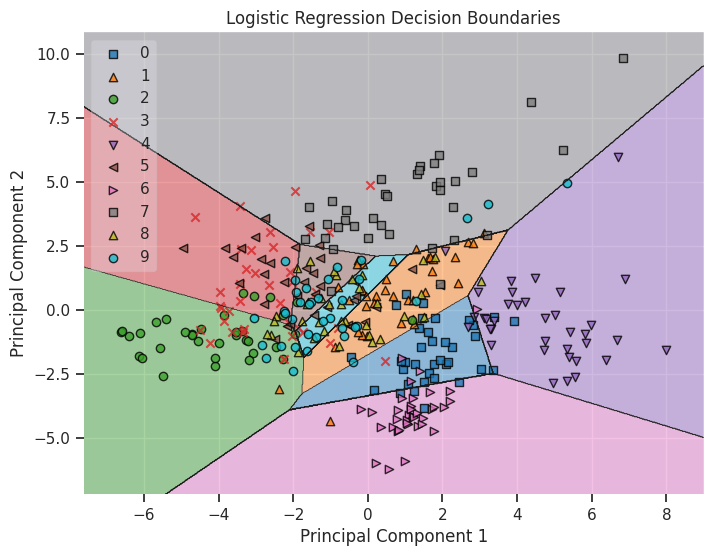

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


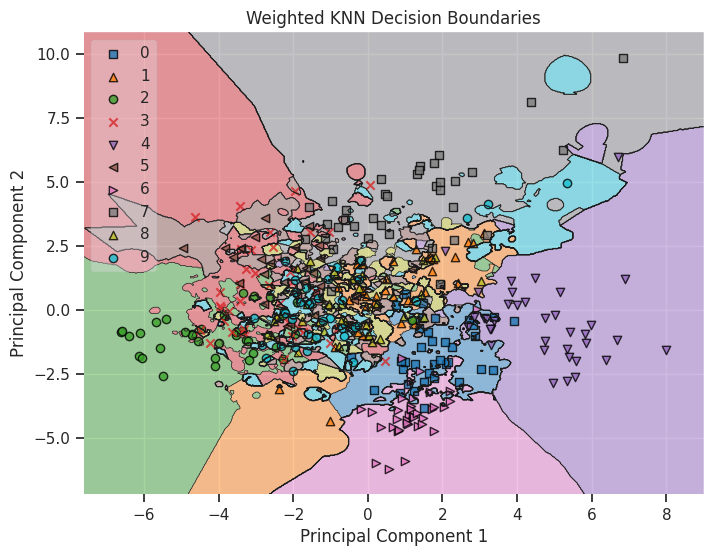

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


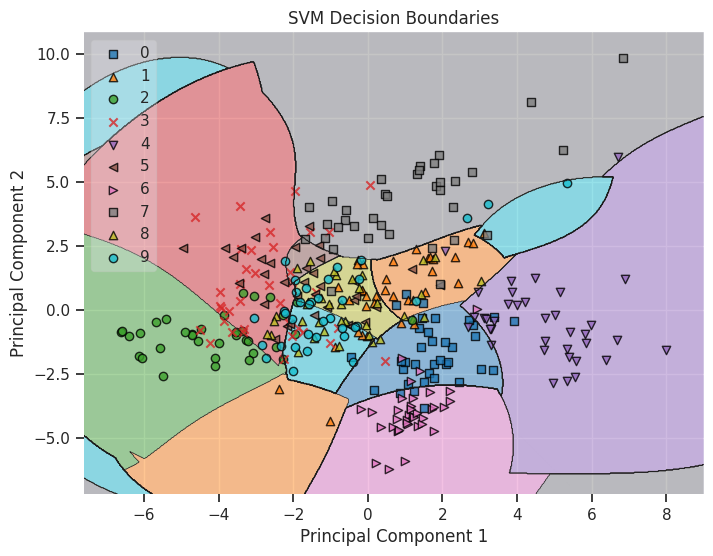

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


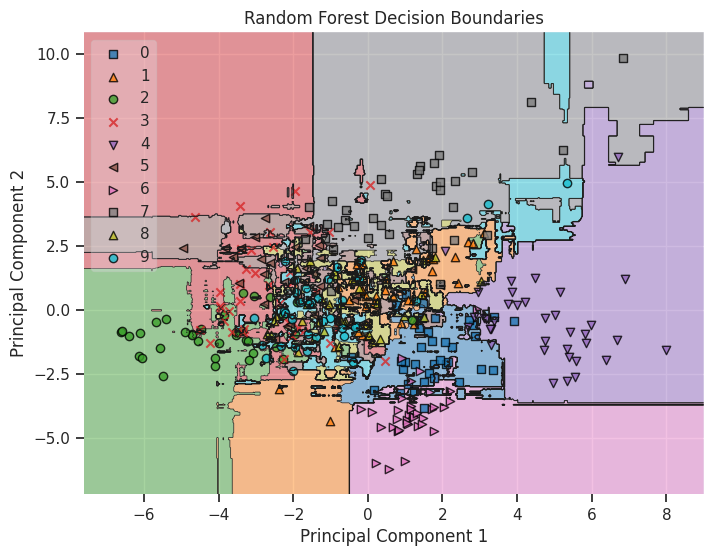

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


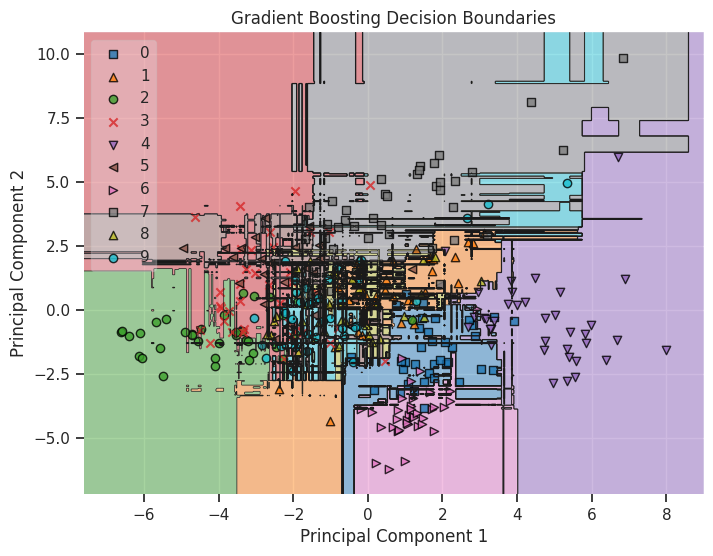

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
])



X_train_transformed = pipeline.fit_transform(X_train)
# Transform the test set using the same PCA transformation
X_test_transformed = pipeline.transform(X_test)


for model_name, model in models.items():
    # Fit the model on the transformed training data
    model.fit(X_train_transformed, y_train)

    # Make predictions on the transformed test set
    y_pred = model.predict(X_test_transformed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Plot decision boundaries
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_transformed, y_test, clf=model, legend=2)
    plt.title(f"{model_name} Decision Boundaries")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

In [ ]:
#